In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('depression_dataset.csv')

In [ ]:
data

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [ ]:
# Count the number of rows with "is_depression" = 1
num_depression = data['is_depression'].value_counts()[1]

# Count the number of rows with "is_depression" = 0
num_non_depression = data['is_depression'].value_counts()[0]

print("Number of rows with is_depression = 1:", num_depression)
print("Number of rows with is_depression = 0:", num_non_depression)


Number of rows with is_depression = 1: 3831
Number of rows with is_depression = 0: 3900


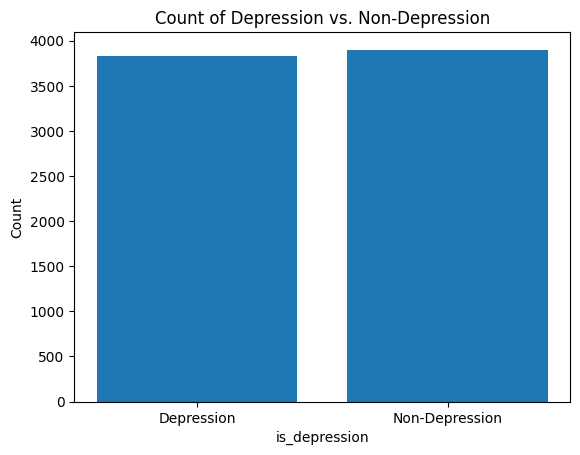

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.bar(['Depression', 'Non-Depression'], [num_depression, num_non_depression])
plt.xlabel('is_depression')
plt.ylabel('Count')
plt.title('Count of Depression vs. Non-Depression')
plt.show()


In [ ]:
depression_data = data[data['is_depression'] == 1].sample(n=150)
non_depression_data = data[data['is_depression'] == 0].sample(n=150)

In [ ]:
depression_data

,clean_text,is_depression
2676,i m f i ve been bullied throughout my entire s...,1
3082,seasonal depression session over,1
1405,i ve been having this for a few day doe anybod...,1
2055,why am i this person i love writing reading sc...,1
2396,in today s society it seems like no one really...,1
...,...,...
3176,minjy take care ye mungkin you boleh sembang s...,1
3751,gaindaswamy ye kon si ameero wali bimari hai m...,1
3599,andygaming une seule issue changer il n y aura...,1
2219,all i want is to be loved no i need to be love...,1


In [ ]:
non_depression_data

,clean_text,is_depression
7312,kevatkinson my bro and si but very young mum w...,0
5789,i m at work and i m sick and it helluva lot to...,0
5983,sloth isliye call nahi kiya baad me thinking k...,0
6675,why do those project report for school need so...,0
4184,scoutbuck ton no hay troll ahhhh,0
...,...,...
6056,beeeaaach,0
4492,sad day manu out for the season,0
7339,i still feel toss though i wa better yesterday...,0
6792,yay am and not a bit tired,0


In [ ]:
#Concatenate
trimmed_data = pd.concat([depression_data, non_depression_data])

In [ ]:
#Shuffle dataset
trimmed_data = trimmed_data.sample(frac=1).reset_index(drop=True)

In [ ]:
trimmed_data.to_csv('trimmed_data.csv', index=False)

In [ ]:
df = pd.read_csv('trimmed_data.csv')

In [ ]:
df

,clean_text,is_depression
0,want to use the directional dance pad pero di ...,0
1,so long story short i recently started to beco...,1
2,cronotriggers that s sad,0
3,whenever i don t follow through with a plan i ...,1
4,grrr my ipod acting weird too jai ho and think...,0
...,...,...
295,my family are all logical people who like to s...,1
296,allieblue i have one vodka mudshake not going ...,0
297,completely wiped and reloaded the 900 lost all...,0
298,in today s society it seems like no one really...,1


Preprocessing

In [ ]:
#Converting text to lowercase
df['clean_text'] = df['clean_text'].str.lower()

In [ ]:
df

,clean_text,is_depression
0,want to use the directional dance pad pero di ...,0
1,so long story short i recently started to beco...,1
2,cronotriggers that s sad,0
3,whenever i don t follow through with a plan i ...,1
4,grrr my ipod acting weird too jai ho and think...,0
...,...,...
295,my family are all logical people who like to s...,1
296,allieblue i have one vodka mudshake not going ...,0
297,completely wiped and reloaded the 900 lost all...,0
298,in today s society it seems like no one really...,1


In [ ]:
#Removing Numbers, Special Charecters, and Punctuations
df['clean_text'] = df['clean_text'].str.replace('[^a-zA-Z]', ' ')

<ipython-input-18-a423134cfb2e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['clean_text'].str.replace('[^a-zA-Z]', ' ')


In [ ]:
df

,clean_text,is_depression
0,want to use the directional dance pad pero di ...,0
1,so long story short i recently started to beco...,1
2,cronotriggers that s sad,0
3,whenever i don t follow through with a plan i ...,1
4,grrr my ipod acting weird too jai ho and think...,0
...,...,...
295,my family are all logical people who like to s...,1
296,allieblue i have one vodka mudshake not going ...,0
297,completely wiped and reloaded the lost all...,0
298,in today s society it seems like no one really...,1


Tokenization

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Tokenizing text into different words
df['tokens'] = df['clean_text'].apply(word_tokenize)

In [ ]:
df['tokens']

0      [want, to, use, the, directional, dance, pad, ...
1      [so, long, story, short, i, recently, started,...
2                          [cronotriggers, that, s, sad]
3      [whenever, i, don, t, follow, through, with, a...
4      [grrr, my, ipod, acting, weird, too, jai, ho, ...
                             ...                        
295    [my, family, are, all, logical, people, who, l...
296    [allieblue, i, have, one, vodka, mudshake, not...
297    [completely, wiped, and, reloaded, the, lost, ...
298    [in, today, s, society, it, seems, like, no, o...
299    [yummy, pizza, for, dinner, top, of, mouth, bu...
Name: tokens, Length: 300, dtype: object

In [ ]:
df

,clean_text,is_depression,tokens
0,want to use the directional dance pad pero di ...,0,"[want, to, use, the, directional, dance, pad, ..."
1,so long story short i recently started to beco...,1,"[so, long, story, short, i, recently, started,..."
2,cronotriggers that s sad,0,"[cronotriggers, that, s, sad]"
3,whenever i don t follow through with a plan i ...,1,"[whenever, i, don, t, follow, through, with, a..."
4,grrr my ipod acting weird too jai ho and think...,0,"[grrr, my, ipod, acting, weird, too, jai, ho, ..."
...,...,...,...
295,my family are all logical people who like to s...,1,"[my, family, are, all, logical, people, who, l..."
296,allieblue i have one vodka mudshake not going ...,0,"[allieblue, i, have, one, vodka, mudshake, not..."
297,completely wiped and reloaded the lost all...,0,"[completely, wiped, and, reloaded, the, lost, ..."
298,in today s society it seems like no one really...,1,"[in, today, s, society, it, seems, like, no, o..."


Stemming

In [ ]:
stemmer = PorterStemmer()

In [ ]:
# Applying Stemming to each token
df['stemmed_tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(token) for token in x])

In [ ]:
df['stemmed_tokens']

0      [want, to, use, the, direct, danc, pad, pero, ...
1      [so, long, stori, short, i, recent, start, to,...
2                             [cronotrigg, that, s, sad]
3      [whenev, i, don, t, follow, through, with, a, ...
4      [grrr, my, ipod, act, weird, too, jai, ho, and...
                             ...                        
295    [my, famili, are, all, logic, peopl, who, like...
296    [allieblu, i, have, one, vodka, mudshak, not, ...
297    [complet, wipe, and, reload, the, lost, all, b...
298    [in, today, s, societi, it, seem, like, no, on...
299    [yummi, pizza, for, dinner, top, of, mouth, bu...
Name: stemmed_tokens, Length: 300, dtype: object

In [ ]:
df

,clean_text,is_depression,tokens,stemmed_tokens
0,want to use the directional dance pad pero di ...,0,"[want, to, use, the, directional, dance, pad, ...","[want, to, use, the, direct, danc, pad, pero, ..."
1,so long story short i recently started to beco...,1,"[so, long, story, short, i, recently, started,...","[so, long, stori, short, i, recent, start, to,..."
2,cronotriggers that s sad,0,"[cronotriggers, that, s, sad]","[cronotrigg, that, s, sad]"
3,whenever i don t follow through with a plan i ...,1,"[whenever, i, don, t, follow, through, with, a...","[whenev, i, don, t, follow, through, with, a, ..."
4,grrr my ipod acting weird too jai ho and think...,0,"[grrr, my, ipod, acting, weird, too, jai, ho, ...","[grrr, my, ipod, act, weird, too, jai, ho, and..."
...,...,...,...,...
295,my family are all logical people who like to s...,1,"[my, family, are, all, logical, people, who, l...","[my, famili, are, all, logic, peopl, who, like..."
296,allieblue i have one vodka mudshake not going ...,0,"[allieblue, i, have, one, vodka, mudshake, not...","[allieblu, i, have, one, vodka, mudshak, not, ..."
297,completely wiped and reloaded the lost all...,0,"[completely, wiped, and, reloaded, the, lost, ...","[complet, wipe, and, reload, the, lost, all, b..."
298,in today s society it seems like no one really...,1,"[in, today, s, society, it, seems, like, no, o...","[in, today, s, societi, it, seem, like, no, on..."


Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
#Applying Lemmatization to all tokens
df['lemmatized_tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

In [ ]:
df['lemmatized_tokens']

0      [want, to, use, the, directional, dance, pad, ...
1      [so, long, story, short, i, recently, started,...
2                          [cronotriggers, that, s, sad]
3      [whenever, i, don, t, follow, through, with, a...
4      [grrr, my, ipod, acting, weird, too, jai, ho, ...
                             ...                        
295    [my, family, are, all, logical, people, who, l...
296    [allieblue, i, have, one, vodka, mudshake, not...
297    [completely, wiped, and, reloaded, the, lost, ...
298    [in, today, s, society, it, seems, like, no, o...
299    [yummy, pizza, for, dinner, top, of, mouth, bu...
Name: lemmatized_tokens, Length: 300, dtype: object

In [ ]:
df

,clean_text,is_depression,tokens,stemmed_tokens,lemmatized_tokens
0,want to use the directional dance pad pero di ...,0,"[want, to, use, the, directional, dance, pad, ...","[want, to, use, the, direct, danc, pad, pero, ...","[want, to, use, the, directional, dance, pad, ..."
1,so long story short i recently started to beco...,1,"[so, long, story, short, i, recently, started,...","[so, long, stori, short, i, recent, start, to,...","[so, long, story, short, i, recently, started,..."
2,cronotriggers that s sad,0,"[cronotriggers, that, s, sad]","[cronotrigg, that, s, sad]","[cronotriggers, that, s, sad]"
3,whenever i don t follow through with a plan i ...,1,"[whenever, i, don, t, follow, through, with, a...","[whenev, i, don, t, follow, through, with, a, ...","[whenever, i, don, t, follow, through, with, a..."
4,grrr my ipod acting weird too jai ho and think...,0,"[grrr, my, ipod, acting, weird, too, jai, ho, ...","[grrr, my, ipod, act, weird, too, jai, ho, and...","[grrr, my, ipod, acting, weird, too, jai, ho, ..."
...,...,...,...,...,...
295,my family are all logical people who like to s...,1,"[my, family, are, all, logical, people, who, l...","[my, famili, are, all, logic, peopl, who, like...","[my, family, are, all, logical, people, who, l..."
296,allieblue i have one vodka mudshake not going ...,0,"[allieblue, i, have, one, vodka, mudshake, not...","[allieblu, i, have, one, vodka, mudshak, not, ...","[allieblue, i, have, one, vodka, mudshake, not..."
297,completely wiped and reloaded the lost all...,0,"[completely, wiped, and, reloaded, the, lost, ...","[complet, wipe, and, reload, the, lost, all, b...","[completely, wiped, and, reloaded, the, lost, ..."
298,in today s society it seems like no one really...,1,"[in, today, s, society, it, seems, like, no, o...","[in, today, s, societi, it, seem, like, no, on...","[in, today, s, society, it, seems, like, no, o..."


**Learning Stemming vs Lemmatization**: Stemming is faster but may result in less accurate word forms, while lemmatization is more accurate but computationally more expensive.

Removing Stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Retrieve the English stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
# Remove the stopwords from the dataset
df['clean_tokens'] = df['tokens'].apply(lambda x: [token for token in x if token not in stop_words])

In [ ]:
# Remove the stopwords from the Lemmatized tokens
df['cleaned_tokens'] = df['lemmatized_tokens'].apply(lambda x: [token for token in x if token not in stop_words])

In [ ]:
df['cleaned_tokens']

0      [want, use, directional, dance, pad, pero, di,...
1      [long, story, short, recently, started, become...
2                                   [cronotriggers, sad]
3      [whenever, follow, plan, feel, stupid, wish, b...
4      [grrr, ipod, acting, weird, jai, ho, thinking,...
                             ...                        
295    [family, logical, people, like, study, read, l...
296     [allieblue, one, vodka, mudshake, going, enough]
297    [completely, wiped, reloaded, lost, bbm, conta...
298    [today, society, seems, like, one, really, car...
299    [yummy, pizza, dinner, top, mouth, burnt, though]
Name: cleaned_tokens, Length: 300, dtype: object

In [ ]:
df

,clean_text,is_depression,tokens,stemmed_tokens,lemmatized_tokens,clean_tokens,cleaned_tokens
0,want to use the directional dance pad pero di ...,0,"[want, to, use, the, directional, dance, pad, ...","[want, to, use, the, direct, danc, pad, pero, ...","[want, to, use, the, directional, dance, pad, ...","[want, use, directional, dance, pad, pero, di,...","[want, use, directional, dance, pad, pero, di,..."
1,so long story short i recently started to beco...,1,"[so, long, story, short, i, recently, started,...","[so, long, stori, short, i, recent, start, to,...","[so, long, story, short, i, recently, started,...","[long, story, short, recently, started, become...","[long, story, short, recently, started, become..."
2,cronotriggers that s sad,0,"[cronotriggers, that, s, sad]","[cronotrigg, that, s, sad]","[cronotriggers, that, s, sad]","[cronotriggers, sad]","[cronotriggers, sad]"
3,whenever i don t follow through with a plan i ...,1,"[whenever, i, don, t, follow, through, with, a...","[whenev, i, don, t, follow, through, with, a, ...","[whenever, i, don, t, follow, through, with, a...","[whenever, follow, plan, feel, stupid, wish, b...","[whenever, follow, plan, feel, stupid, wish, b..."
4,grrr my ipod acting weird too jai ho and think...,0,"[grrr, my, ipod, acting, weird, too, jai, ho, ...","[grrr, my, ipod, act, weird, too, jai, ho, and...","[grrr, my, ipod, acting, weird, too, jai, ho, ...","[grrr, ipod, acting, weird, jai, ho, thinking,...","[grrr, ipod, acting, weird, jai, ho, thinking,..."
...,...,...,...,...,...,...,...
295,my family are all logical people who like to s...,1,"[my, family, are, all, logical, people, who, l...","[my, famili, are, all, logic, peopl, who, like...","[my, family, are, all, logical, people, who, l...","[family, logical, people, like, study, read, l...","[family, logical, people, like, study, read, l..."
296,allieblue i have one vodka mudshake not going ...,0,"[allieblue, i, have, one, vodka, mudshake, not...","[allieblu, i, have, one, vodka, mudshak, not, ...","[allieblue, i, have, one, vodka, mudshake, not...","[allieblue, one, vodka, mudshake, going, enough]","[allieblue, one, vodka, mudshake, going, enough]"
297,completely wiped and reloaded the lost all...,0,"[completely, wiped, and, reloaded, the, lost, ...","[complet, wipe, and, reload, the, lost, all, b...","[completely, wiped, and, reloaded, the, lost, ...","[completely, wiped, reloaded, lost, bbm, conta...","[completely, wiped, reloaded, lost, bbm, conta..."
298,in today s society it seems like no one really...,1,"[in, today, s, society, it, seems, like, no, o...","[in, today, s, societi, it, seem, like, no, on...","[in, today, s, society, it, seems, like, no, o...","[today, society, seems, like, one, really, car...","[today, society, seems, like, one, really, car..."


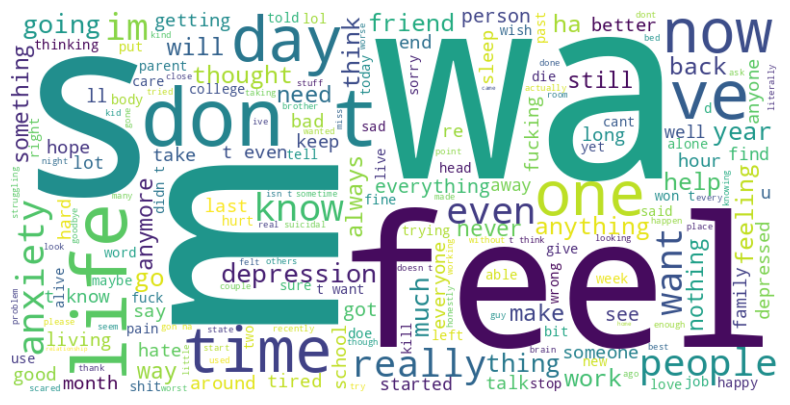

In [ ]:
#Wordcloud for all the tokens

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all lemmatized tokens into a single string
all_tokens = ' '.join(df['tokens'].sum())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

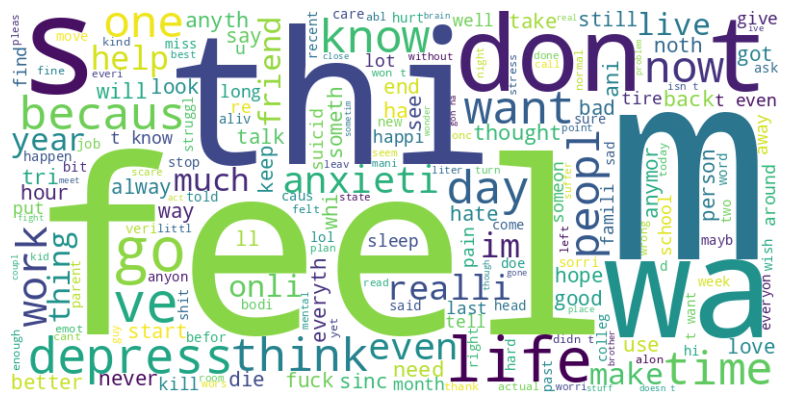

In [ ]:
#Wordcloud for all the Stemmed Tokens

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all lemmatized tokens into a single string
all_tokens = ' '.join(df['stemmed_tokens'].sum())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

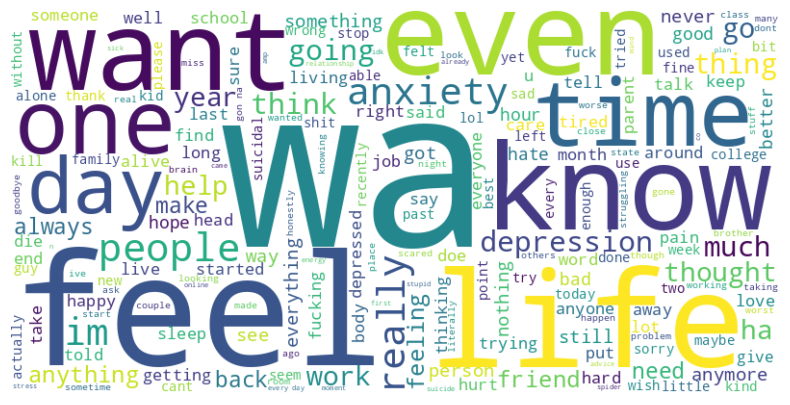

In [ ]:
#Wordcloud for all the lemmatized tokens after removing stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all lemmatized tokens into a single string
all_tokens = ' '.join(df['cleaned_tokens'].sum())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Other Graphs

In [ ]:
from collections import Counter

# Combine all lemmatized tokens into a single list
all_tokens_list = [token for sublist in df['cleaned_tokens'] for token in sublist]

# Count the frequency of each token
token_counts = Counter(all_tokens_list)


In [ ]:
num_top_tokens = 10  # Number of top tokens to consider

top_tokens = [token for token, count in token_counts.most_common(num_top_tokens)]
top_token_counts = [count for token, count in token_counts.most_common(num_top_tokens)]

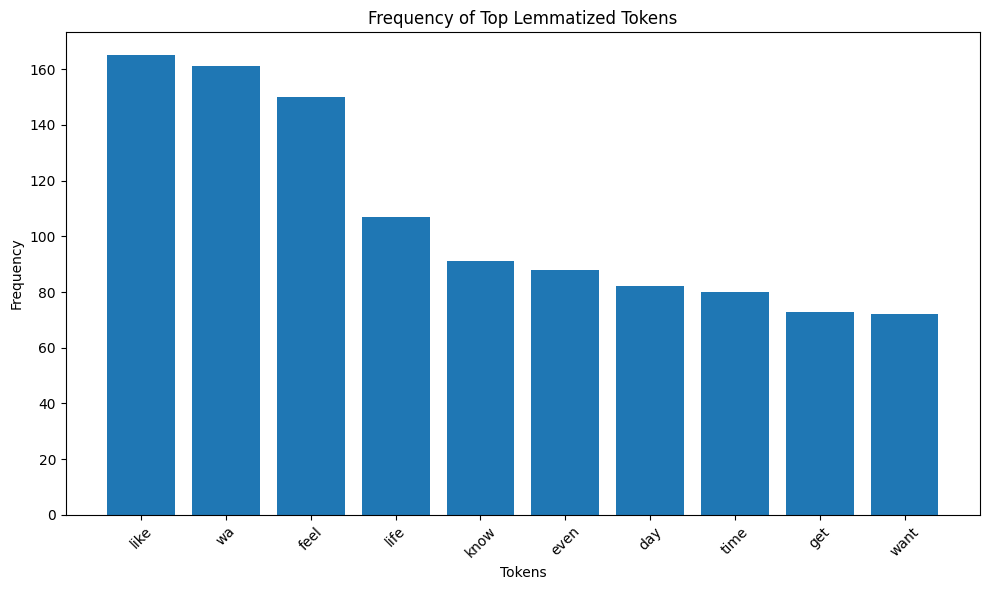

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_tokens, top_token_counts)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Frequency of Top Lemmatized Tokens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Sorting all unique lammatized tokens
unique_tokens = sorted(set(all_tokens_list))

In [ ]:
# Create a matrix to store the frequencies
frequency_matrix = []

# Iterate over each document or category
for document in df['cleaned_tokens']:
    # Count the frequency of each token in the document
    document_counts = Counter(document)

    # Create a row representing the frequencies of tokens in the document
    row = [document_counts[token] for token in unique_tokens]

    # Append the row to the frequency matrix
    frequency_matrix.append(row)

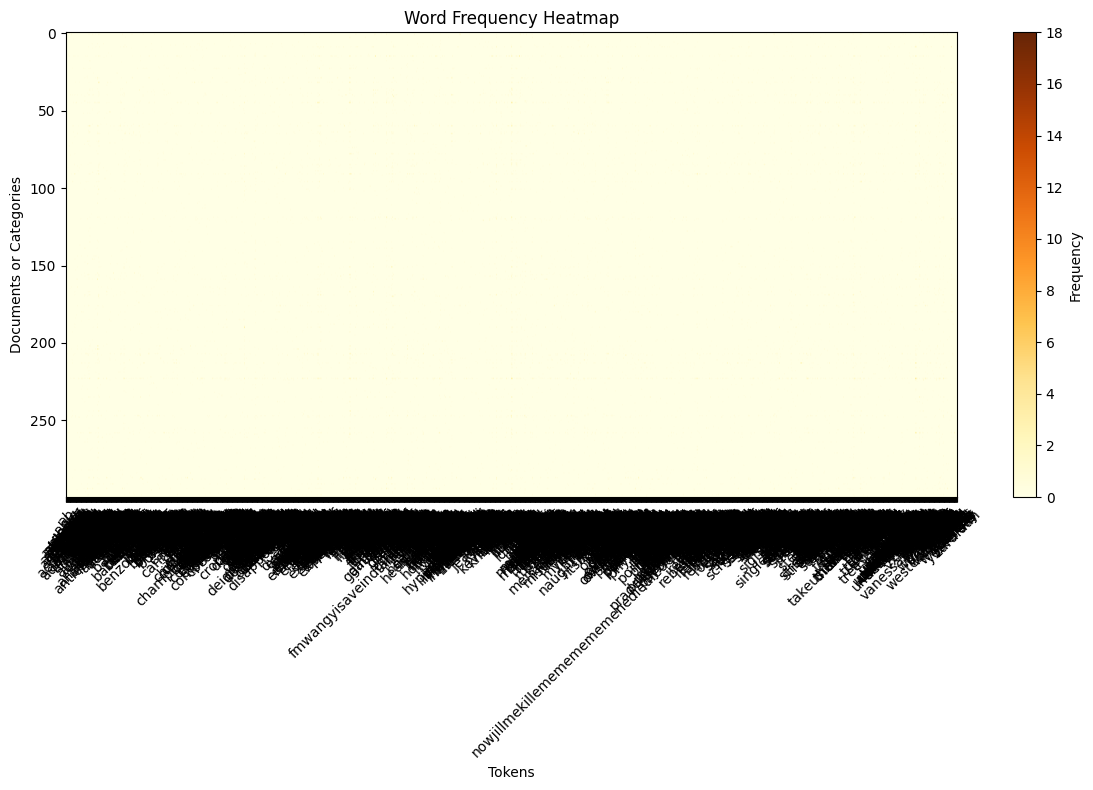

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the frequency matrix to a NumPy array
frequency_matrix = np.array(frequency_matrix)

# Create the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(frequency_matrix, cmap='YlOrBr', aspect='auto')
plt.colorbar(label='Frequency')
plt.title('Word Frequency Heatmap')
plt.xlabel('Tokens')
plt.ylabel('Documents or Categories')
plt.xticks(ticks=np.arange(len(unique_tokens)), labels=unique_tokens, rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Combine lemmatized tokens into sentences
df['lemmatized_sentences'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
df

,clean_text,is_depression,tokens,stemmed_tokens,lemmatized_tokens,clean_tokens,cleaned_tokens,lemmatized_sentences
0,want to use the directional dance pad pero di ...,0,"[want, to, use, the, directional, dance, pad, ...","[want, to, use, the, direct, danc, pad, pero, ...","[want, to, use, the, directional, dance, pad, ...","[want, use, directional, dance, pad, pero, di,...","[want, use, directional, dance, pad, pero, di,...",want to use the directional dance pad pero di ...
1,so long story short i recently started to beco...,1,"[so, long, story, short, i, recently, started,...","[so, long, stori, short, i, recent, start, to,...","[so, long, story, short, i, recently, started,...","[long, story, short, recently, started, become...","[long, story, short, recently, started, become...",so long story short i recently started to beco...
2,cronotriggers that s sad,0,"[cronotriggers, that, s, sad]","[cronotrigg, that, s, sad]","[cronotriggers, that, s, sad]","[cronotriggers, sad]","[cronotriggers, sad]",cronotriggers that s sad
3,whenever i don t follow through with a plan i ...,1,"[whenever, i, don, t, follow, through, with, a...","[whenev, i, don, t, follow, through, with, a, ...","[whenever, i, don, t, follow, through, with, a...","[whenever, follow, plan, feel, stupid, wish, b...","[whenever, follow, plan, feel, stupid, wish, b...",whenever i don t follow through with a plan i ...
4,grrr my ipod acting weird too jai ho and think...,0,"[grrr, my, ipod, acting, weird, too, jai, ho, ...","[grrr, my, ipod, act, weird, too, jai, ho, and...","[grrr, my, ipod, acting, weird, too, jai, ho, ...","[grrr, ipod, acting, weird, jai, ho, thinking,...","[grrr, ipod, acting, weird, jai, ho, thinking,...",grrr my ipod acting weird too jai ho and think...
...,...,...,...,...,...,...,...,...
295,my family are all logical people who like to s...,1,"[my, family, are, all, logical, people, who, l...","[my, famili, are, all, logic, peopl, who, like...","[my, family, are, all, logical, people, who, l...","[family, logical, people, like, study, read, l...","[family, logical, people, like, study, read, l...",my family are all logical people who like to s...
296,allieblue i have one vodka mudshake not going ...,0,"[allieblue, i, have, one, vodka, mudshake, not...","[allieblu, i, have, one, vodka, mudshak, not, ...","[allieblue, i, have, one, vodka, mudshake, not...","[allieblue, one, vodka, mudshake, going, enough]","[allieblue, one, vodka, mudshake, going, enough]",allieblue i have one vodka mudshake not going ...
297,completely wiped and reloaded the lost all...,0,"[completely, wiped, and, reloaded, the, lost, ...","[complet, wipe, and, reload, the, lost, all, b...","[completely, wiped, and, reloaded, the, lost, ...","[completely, wiped, reloaded, lost, bbm, conta...","[completely, wiped, reloaded, lost, bbm, conta...",completely wiped and reloaded the lost all bbm...
298,in today s society it seems like no one really...,1,"[in, today, s, society, it, seems, like, no, o...","[in, today, s, societi, it, seem, like, no, on...","[in, today, s, society, it, seems, like, no, o...","[today, society, seems, like, one, really, car...","[today, society, seems, like, one, really, car...",in today s society it seems like no one really...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
X = df['lemmatized_sentences']  # Input data (lemmatized sentences)
y = df['is_depression']  # Target labels (0 or 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipelines = [
    ('Logistic Regression', Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', LogisticRegression())
    ])),
    ('Random Forest', Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', RandomForestClassifier())
    ])),
    ('Support Vector Machine', Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', SVC())
    ]))
]

for name, pipeline in pipelines:
    print(f"Training data on {name} Model...")
    pipeline.fit(X_train, y_train)


Training data on Logistic Regression Model...
Training data on Random Forest Model...
Training data on Support Vector Machine Model...


In [ ]:
for name, pipeline in pipelines:
    print(f"Evaluating {name}...")
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f"{name} Classification Report:\n{report}\n")

Evaluating Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        34
           1       0.92      0.88      0.90        26

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60


Evaluating Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        34
           1       1.00      0.85      0.92        26

    accuracy                           0.93        60
   macro avg       0.95      0.92      0.93        60
weighted avg       0.94      0.93      0.93        60


Evaluating Support Vector Machine...
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        34
          

In [ ]:
# Create a pipeline with only Logistic Regression
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

# Train the model
print("Training Logistic Regression...")
lr_pipeline.fit(X_train, y_train)

Training Logistic Regression...


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
# Classify new data
new_data = ["Feeling really down today, can't seem to shake it off."]
for name, pipeline in pipelines:
    predicted_label = pipeline.predict(new_data)
    print(f"{name} Predicted Label for New Data: {predicted_label}")

Logistic Regression Predicted Label for New Data: [0]
Random Forest Predicted Label for New Data: [0]
Support Vector Machine Predicted Label for New Data: [0]


In [ ]:
# Classify new data
new_data = ["recently i have been having a tough time dealing with my lack of motivation is really hard to care about anything specially when i always feel like im being forced to do anything even thing that i like to do it like im being constanly dragged through life how do you guy deal with extreme apathy and lack of motivation when you dont really have any interest in existing"]
for name, pipeline in pipelines:
    predicted_label = pipeline.predict(new_data)
    print(f"{name} Predicted Label for New Data: {predicted_label}")

Logistic Regression Predicted Label for New Data: [1]
Random Forest Predicted Label for New Data: [1]
Support Vector Machine Predicted Label for New Data: [1]


In [ ]:
# Classify new data
new_data = ["Im not feeling too great, my heart is heavy"]
for name, pipeline in pipelines:
    predicted_label = pipeline.predict(new_data)
    print(f"{name} Predicted Label for New Data: {predicted_label}")

Logistic Regression Predicted Label for New Data: [0]
Random Forest Predicted Label for New Data: [0]
Support Vector Machine Predicted Label for New Data: [0]


In [ ]:
# Classify new data
new_data = ["tough time dealing with my lack of motivation"]
for name, pipeline in pipelines:
    predicted_label = pipeline.predict(new_data)
    print(f"{name} Predicted Label for New Data: {predicted_label}")

Logistic Regression Predicted Label for New Data: [0]
Random Forest Predicted Label for New Data: [0]
Support Vector Machine Predicted Label for New Data: [0]


In [ ]:
# Classify new data
new_data = ["i dont bother doing anything all day and im failing college yet im still tired and im constantly thinking about suicide"]
for name, pipeline in pipelines:
    predicted_label = pipeline.predict(new_data)
    print(f"{name} Predicted Label for New Data: {predicted_label}")

Logistic Regression Predicted Label for New Data: [0]
Random Forest Predicted Label for New Data: [0]
Support Vector Machine Predicted Label for New Data: [0]


In [ ]:
# Classify new data
new_data = ["i m having a horrible night and i m too nervous to call the suicide crisis hotline i just need someone to talk to really bad please"]
for name, pipeline in pipelines:
    predicted_label = pipeline.predict(new_data)
    print(f"{name} Predicted Label for New Data: {predicted_label}")

Logistic Regression Predicted Label for New Data: [1]
Random Forest Predicted Label for New Data: [0]
Support Vector Machine Predicted Label for New Data: [0]


In [ ]:
# Classify new data
new_data = ["i m having a horrible night and i m too nervous to call the suicide crisis hotline i just need someone to talk to really bad please"]
predicted_label = lr_pipeline.predict(new_data)
print("Logistic Regression Predicted Label for New Data:", predicted_label)

Logistic Regression Predicted Label for New Data: [1]


In [ ]:
# Classify new data
new_data = ["i just need someone to talk to really bad please"]
predicted_label = lr_pipeline.predict(new_data)
print("Logistic Regression Predicted Label for New Data:", predicted_label)

Logistic Regression Predicted Label for New Data: [0]


In [ ]:
# Classify new data
new_data = ["i dont bother doing anything all day and im failing college yet im still tired and im constantly thinking about suicide"]
predicted_label = lr_pipeline.predict(new_data)
print("Logistic Regression Predicted Label for New Data:", predicted_label)

Logistic Regression Predicted Label for New Data: [0]


In [ ]:
# Classify new data
new_data = ["i m really starting to believe my life will not get better i ve been so sad for so long i don t see a fkin point sorry for the rant just really over life and fkin shit people"]
for name, pipeline in pipelines:
    predicted_label = pipeline.predict(new_data)
    print(f"{name} Predicted Label for New Data: {predicted_label}")

Logistic Regression Predicted Label for New Data: [1]
Random Forest Predicted Label for New Data: [1]
Support Vector Machine Predicted Label for New Data: [1]


In [ ]:
# Classify new data
new_data = ["why do i feel like when i m about to talk to someone i always see what am i lacking and how to provide solution for it and then not going to tell it in the end wtf"]
for name, pipeline in pipelines:
    predicted_label = pipeline.predict(new_data)
    print(f"{name} Predicted Label for New Data: {predicted_label}")

Logistic Regression Predicted Label for New Data: [1]
Random Forest Predicted Label for New Data: [1]
Support Vector Machine Predicted Label for New Data: [1]
